In [4]:
install.packages("igraph")
library(igraph)


The downloaded binary packages are in
	/var/folders/m6/4mgxnhd5575fll1p8n3_wcjc0000gn/T//RtmpZKdGNx/downloaded_packages



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




QUESTION 1A: Create undirected random networks with n = 1000 nodes, and the probability p for drawing an edge between two arbitrary vertices 0.003, 0.004, 0.01, 0.05, and 0.1. Plot the degree distributions. What distribution is observed? Explain why. Also, report the mean and variance of the degree distributions and compare them to the theoretical values.

In [12]:
probs = c(0.003, 0.004, 0.01, 0.05, 0.1)

[1] "Analytical mean of the degree distribution is : 3"
[1] "Simulated mean of the degree distribution is : 3.026"
[1] "Analytical variance of the  degree distribution is : 2.991"
[1] "Simulated variance of the  degree distribution is : 2.68801201201201"


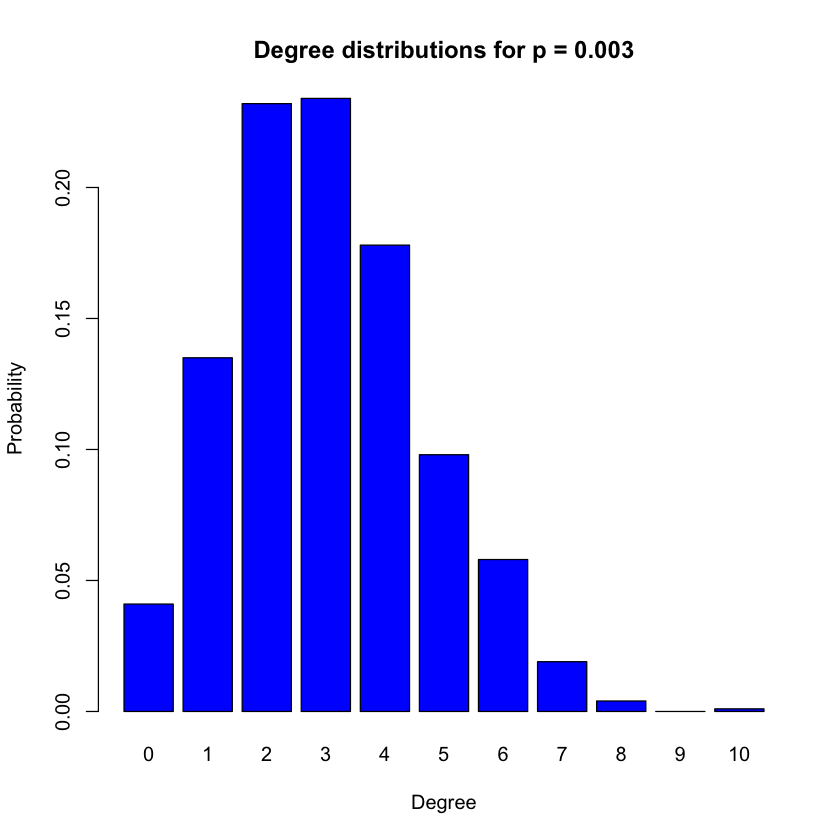

[1] "Analytical mean of the degree distribution is : 4"
[1] "Simulated mean of the degree distribution is : 4.058"
[1] "Analytical variance of the  degree distribution is : 3.984"
[1] "Simulated variance of the  degree distribution is : 4.18081681681682"


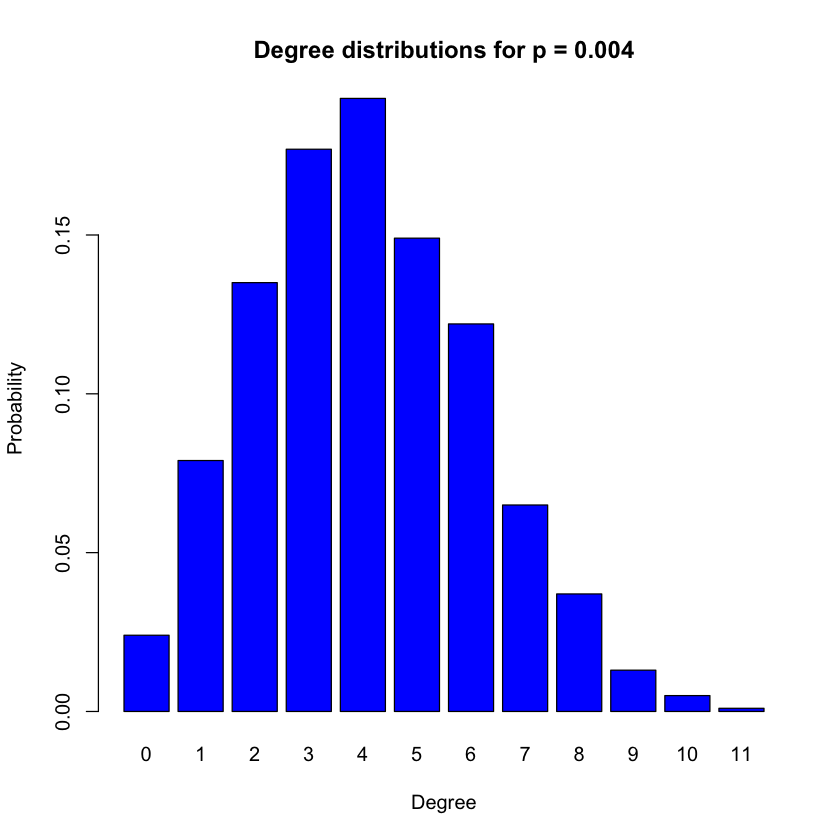

[1] "Analytical mean of the degree distribution is : 10"
[1] "Simulated mean of the degree distribution is : 10.09"
[1] "Analytical variance of the  degree distribution is : 9.9"
[1] "Simulated variance of the  degree distribution is : 10.3562562562563"


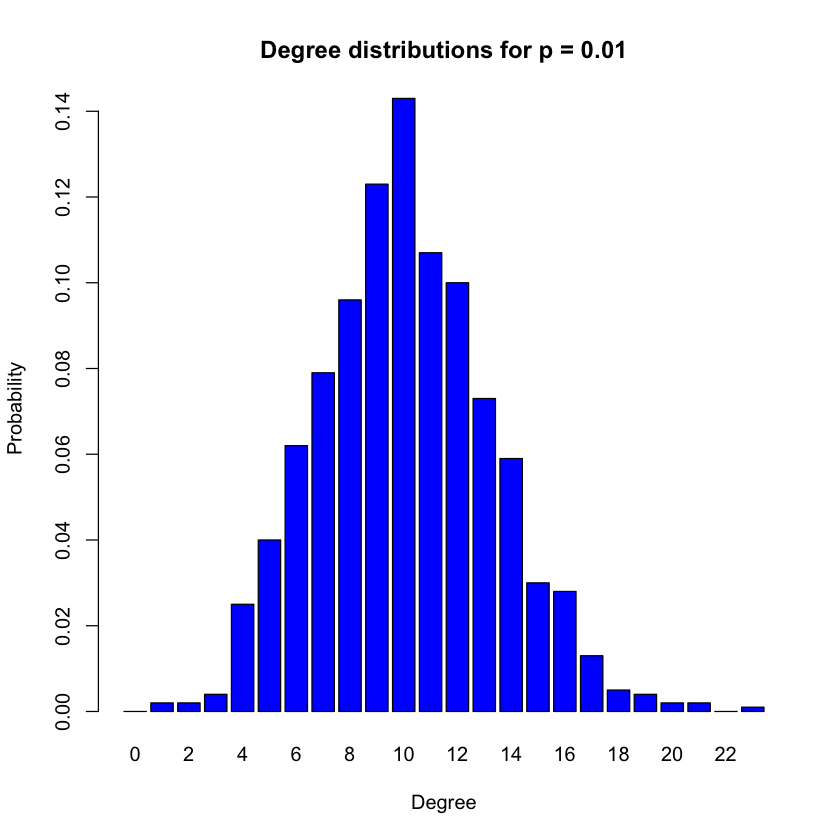

[1] "Analytical mean of the degree distribution is : 50"
[1] "Simulated mean of the degree distribution is : 49.862"
[1] "Analytical variance of the  degree distribution is : 47.5"
[1] "Simulated variance of the  degree distribution is : 46.9178738738739"


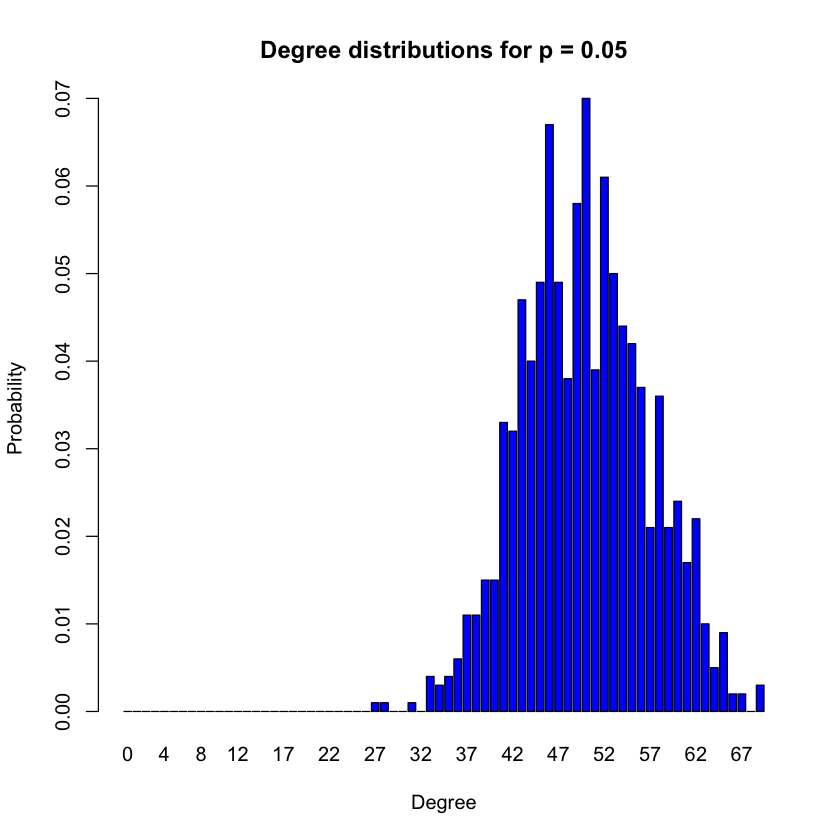

[1] "Analytical mean of the degree distribution is : 100"
[1] "Simulated mean of the degree distribution is : 100.384"
[1] "Analytical variance of the  degree distribution is : 90"
[1] "Simulated variance of the  degree distribution is : 92.487031031031"


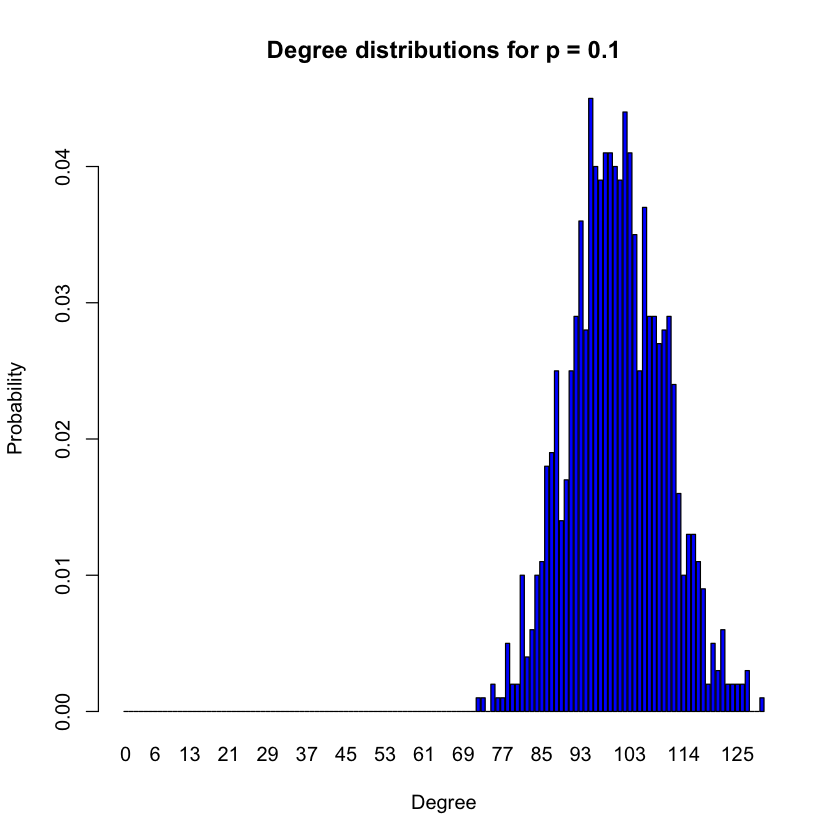

In [18]:
num_nodes <- 1000
for (p in probs){
    graph = sample_gnp(num_nodes, p, directed=FALSE)
    node_deg_dist = degree.distribution(graph)
    xVals = c(0: (length(node_deg_dist)-1))
    barplot(node_deg_dist, names.arg=xVals, xlab="Degree", ylab="Probability",
        main = paste("Degree distributions for p =", p, sep = " "),col="blue")
    
    analytical_mean = num_nodes * p
    analytical_variance = num_nodes * p * (1-p)
    simulated_mean = mean(degree(graph))
    simulated_variance = var(degree(graph))
    print(paste("Analytical mean of the degree distribution is",":", analytical_mean))
    print(paste("Simulated mean of the degree distribution is",":", simulated_mean))
    print(paste("Analytical variance of the  degree distribution is",":", analytical_variance))
    print(paste("Simulated variance of the  degree distribution is",":", simulated_variance))
}


These are binomial distributions since a given node $v_i$ has n-1 possible nodes it can form an edge with where n is the total number of nodes in the network. Among these, it picks k nodes to form edges. The equation for this turns out to be
$P(deg(v_i)=k)={n-1 \choose k}p^k (1-p)^{n-1-k}$ which is of the form of a binomial distribution.

QUESTION 1B: For each p and n = 1000, answer the following questions:
Are all random realizations of the ER network connected? Numerically estimate the
probability that a generated network is connected. For one instance of the networks
with that p, find the giant connected component (GCC) if not connected. What is
the diameter of the GCC?

From the discussion sessions, there is a threshold where the nodes will likely be disconnected to them likely being fully connected. This threshold is $p < \frac{ln(n)}{n}$  for likely being disconnected and $p > \frac{ln(n)}{n}$ for likely being connected. Even above this threshold, there is still a possibility that a generated network will be disconnected. Hence, not all random realized network are connected. 

In [19]:
for (p in probs){
    connectedCount_dis = 0
    for(i in c(1:1000)) {
            temp_g = sample_gnp(num_nodes, p, directed = FALSE)
            if(is_connected(temp_g)) {
                connectedCount_dis = connectedCount_dis + 1
            }
        }
    connectivity_prob_dis = connectedCount_dis/1000
    print(paste("Estimated connectivity probability for p =",p,":", connectivity_prob_dis))
}

[1] "Estimated connectivity probability for p = 0.003 : 0"
[1] "Estimated connectivity probability for p = 0.004 : 0"
[1] "Estimated connectivity probability for p = 0.01 : 0.962"
[1] "Estimated connectivity probability for p = 0.05 : 1"
[1] "Estimated connectivity probability for p = 0.1 : 1"


In [63]:
for (p in probs){
    g = sample_gnp(num_nodes, p, directed = FALSE)
    #print(paste("Diameter for p =",p,":", diameter(g, directed=FALSE, unconnected=TRUE)))
    print(paste("Diameter for p =",p,":", max(clusters(g)$csize)))
}

[1] "Diameter for p = 0.003 : 927"
[1] "Diameter for p = 0.004 : 982"
[1] "Diameter for p = 0.01 : 1000"
[1] "Diameter for p = 0.05 : 1000"
[1] "Diameter for p = 0.1 : 1000"


QUESTION 1C: For n = 1000, sweep over values of p from 0 to a pmax that makes the network almost
surely connected and create 100 random networks for each p. pmax should be roughly
determined by yourself. Then scatter plot the normalized GCC sizes vs p. Plot a line
of the average normalized GCC sizes for each p along with the scatter plot.

From the lectures, as described above, the likelihood is very high that the network is connected is $\frac{ln(n)}{n}$, hence this could be a good value for $p_{max}$. Since we would like to include this value in the plot, a value greater than this at 0.01 will be used.

In [71]:
num_nodes = 1000
connectivity_threshold = log(num_nodes)/num_nodes
gcc_threshold = 1/num_nodes
print(paste("p_max:",p_max))
print(paste("GCC threshold:", gcc_threshold))

[1] "p_max: 0.00690775527898214"
[1] "GCC threshold: 0.001"


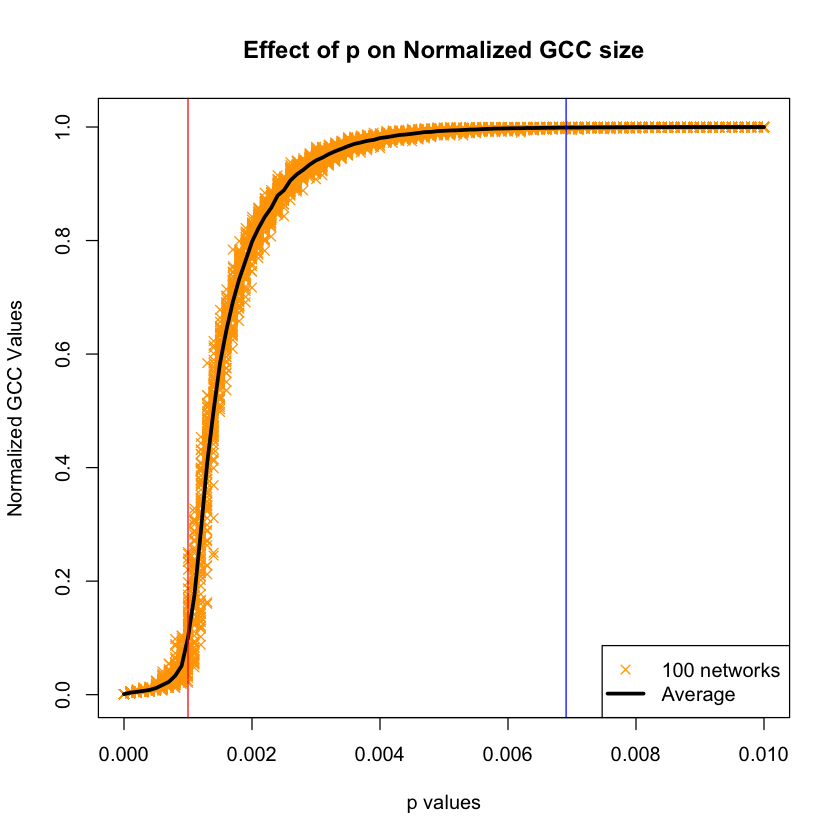

In [75]:
p_sweep = seq(0, 0.01, 0.0001)
avgVals = rep(0, length(p_sweep))
j = 1
plot(1, type = "n", xlab = "p values",
     ylab = "Normalized GCC Values", xlim = c(0, 0.01),
     main = "Effect of p on Normalized GCC size",
     ylim = c(0, 1.01))
for (p in p_sweep) {
    total = 0
    for (i in c(1:100)) {
        g = sample_gnp(num_nodes, p, directed = FALSE)
        comps = clusters(g)
        sz = max(comps$csize)
        normalizedGCC = sz / num_nodes
        total = total + normalizedGCC
        points(p, normalizedGCC, col= 'orange', pch=4)
    }
    avgVals[j] = total / 100
    j = j + 1
}
lines(p_sweep, avgVals, lwd=3.0)
abline(v=gcc_threshold, col="red")
abline(v=connectivity_threshold, col="blue")
legend(x = "bottomright",
       legend = c("100 networks", "Average"),  
       pch = c(4, NA),           
       lty = c(NA, 1),           
       lwd = c(NA, 3.0),
       col = c("orange", 1)
      )

i. Empirically estimate the value of p where a giant connected component starts to
emerge (define your criterion of “emergence”)? Do they match with theoretical
values mentioned or derived in lectures?

Empirically, there is an inflection point at around 0.0008. This looks to be where the GCC emerges. This is very close to the theoretical value found in the lectures and as shown by the red line for the connectivity threshold.

ii. Empirically estimate the value of p where the giant connected component takes
up over 99% of the nodes in almost every experiment.

The value of p where this occurs looks to be around 0.0055. 

QUESTION 1(d) i. Define the average degree of nodes c = n × p = 0.5. Sweep over the number of
nodes, n, ranging from 100 to 10000. Plot the expected size of the GCC of ER
networks with n nodes and edge-formation probabilities p = c/n, as a function
of n. What trend is observed?

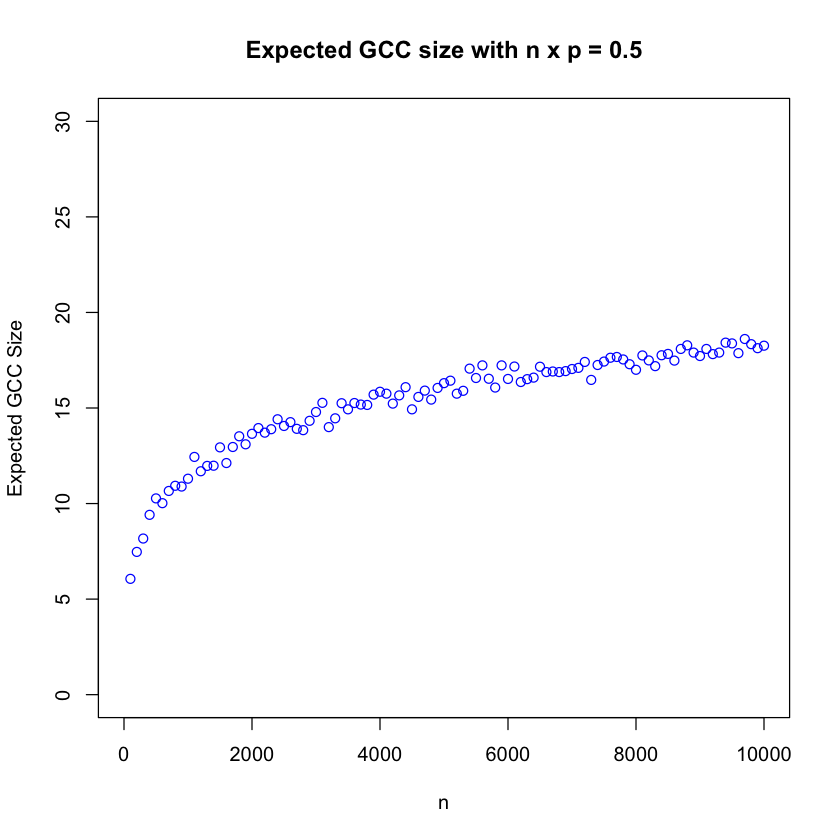

In [84]:
n_sweep = seq(100, 10000, 100)
plot(1, type = "n", xlab = "n",
     ylab = "Expected GCC Size", xlim = c(0, 10000), ylim = c(0, 30),
     main = "Expected GCC size with n x p = 0.5")
for (i in n_sweep) {
        p = 0.5 / i
        #Expected value calculation
        total = 0
        for (j in c(1:100)) {
            g = sample_gnp(i, p, directed = FALSE)
            comps = clusters(g)
            sz = max(comps$csize)
            total = total + sz
        }
        expected_val = total / 100
        points(i, expected_val, col= colors[k])
}

The trend looks logarithmic as n increases.

ii. Repeat the same for c = 1.

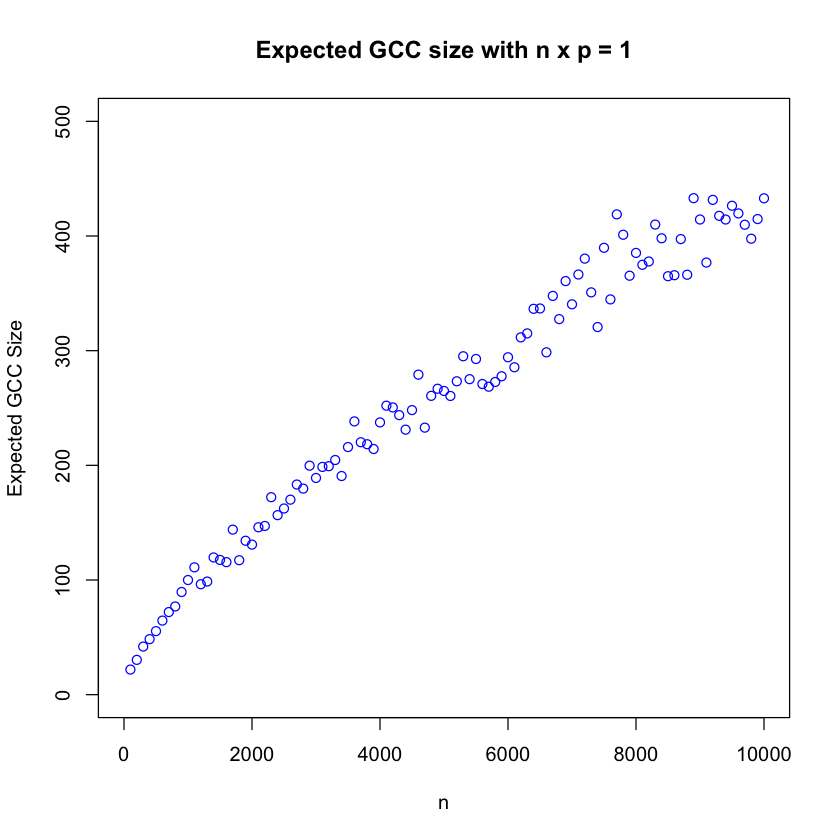

In [88]:
n_sweep = seq(100, 10000, 100)
plot(1, type = "n", xlab = "n",
     ylab = "Expected GCC Size", xlim = c(0, 10000), ylim = c(0, 500),
     main = "Expected GCC size with n x p = 1")
for (i in n_sweep) {
        p = 1 / i
        #Expected value calculation
        total = 0
        for (j in c(1:100)) {
            g = sample_gnp(i, p, directed = FALSE)
            comps = clusters(g)
            sz = max(comps$csize)
            total = total + sz
        }
        expected_val = total / 100
        points(i, expected_val, col= colors[k])
}

The trend looks a bit logarithmic but also looks more linear than part (i). The values become more spread out as n increases if there were a distance from an average line.

iii. Repeat the same for values of c = 1.1, 1.2, 1.3, and show the results for these
three values in a single plot.

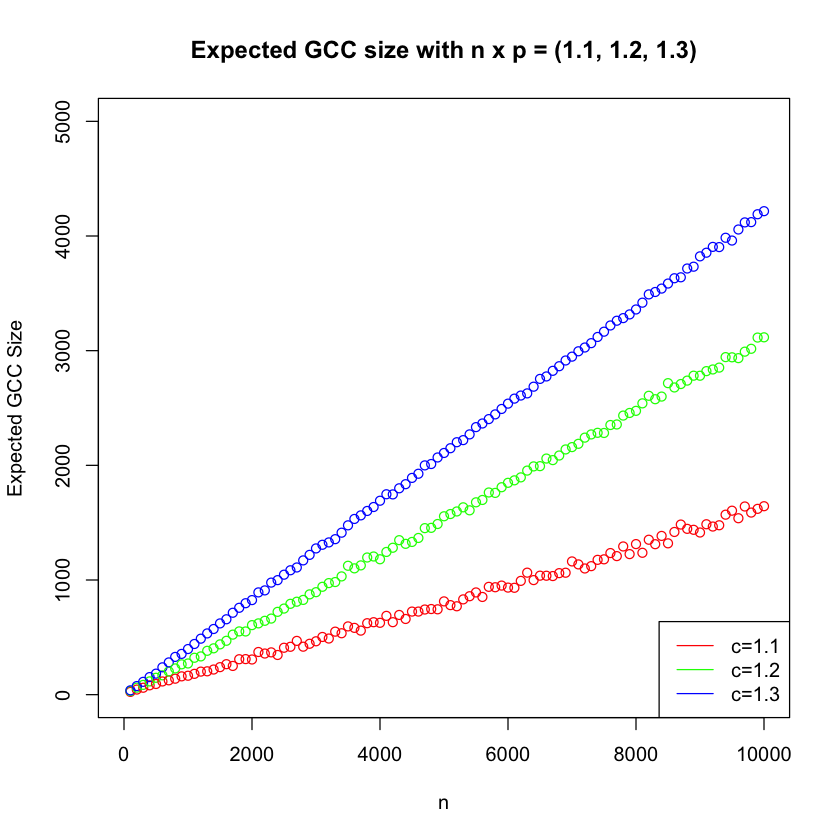

In [80]:
n_sweep = seq(100, 10000, 100)

c_sweep = c(1.1, 1.2, 1.3)
colors = c("red", "green", "blue")

plot(1, type = "n", xlab = "n",
     ylab = "Expected GCC Size", xlim = c(0, 10000), ylim = c(0, 5000),
     main = "Expected GCC size with n x p = (1.1, 1.2, 1.3)")

for (i in n_sweep) {
    for (k in (1 : length(c_sweep))) {
        p = c_sweep[k] / i
        #Expected value calculation
        total = 0
        for (j in c(1:100)) {
            g = sample_gnp(i, p, directed = FALSE)
            comps = clusters(g)
            sz = max(comps$csize)
            total = total + sz
        }
        expected_val = total / 100
        points(i, expected_val, col= colors[k])
    }
}

legend(x = "bottomright",
       legend = c("c=1.1", "c=1.2", "c=1.3"),             
       lty = c(1, 1, 1),           
       col = c("red", "green", "blue")
      )

iv. What is the relation between the expected GCC size and n in each case?

For the three cases above, the trend looks to be linear-increasing between n and expected GCC size.

QUESTION 2: Create networks using preferential attachment model

(a) Create an undirected network with n = 1000 nodes, with preferential attachment
model, where each new node attaches to m = 1 old nodes. Is such a network always
connected?

In [96]:
for (i in seq(0, 100000, 1)){
    g = sample_pa(1000, m=1, directed=FALSE)
    if(!is_connected(g)){
        print("Not connected")
    }
}

As can be seen from running the cell above, testing 100,000 different networks, none were disconnected. This isn't an exhaustive proof that it will always be connected but it does point in that direction.

(b) Use fast greedy method to find the community structure. Measure modularity.

In [97]:
cluster_fast_greedy(g)

IGRAPH clustering fast greedy, groups: 35, mod: 0.93
+ groups:
  $`1`
   [1]  36  50  66  91 116 134 166 192 227 290 294 317 354 357 381 395 402 415
  [19] 424 433 434 460 478 509 531 542 546 561 574 588 612 685 687 707 711 714
  [37] 750 777 796 808 812 829 857 864 937 953 963 966 998
  
  $`2`
   [1]   4   5  24  39  46  47  60  85 154 159 214 228 230 240 245 265 281 296
  [19] 312 353 407 457 495 521 528 538 551 562 578 595 601 661 739 742 754 775
  [37] 835 848 865 877 902 907 929 931 985
  
  + ... omitted several groups/vertices

In [100]:
modularity(cluster_fast_greedy(g))

[1] 0.9315652

(c) Try to generate a larger network with 10000 nodes using the same model. Compute
modularity. How is it compared to the smaller network’s modularity?

In [101]:
g2 = sample_pa(10000, m=1, directed=FALSE)
modularity(cluster_fast_greedy(g2))

[1] 0.9783375

Modularity is slightly higher here than for the graph in (b).

(d) Plot the degree distribution in a log-log scale for both n = 1000, 10000, then estimate
the slope of the plot using linear regression.

ERROR: Error in plot.window(xlim, ylim, log = log, ...): need finite 'ylim' values


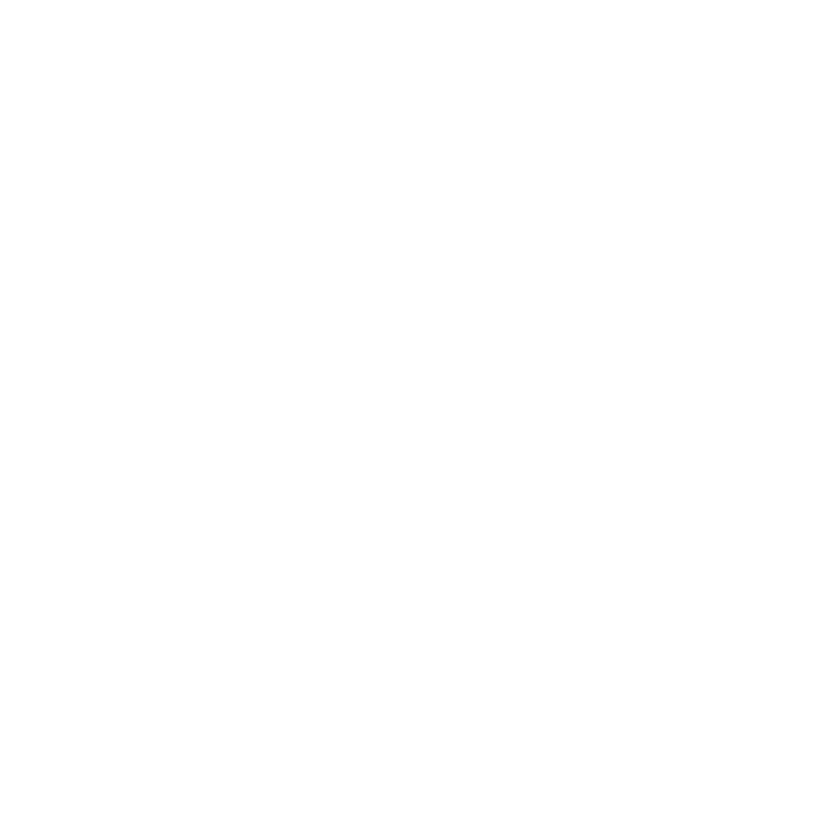

In [107]:
g_deg_dist = log(degree.distribution(g))
xVals = log(c(0: (length(g_deg_dist)-1)))
barplot(g_deg_dist, names.arg=xVals, xlab="Degree", ylab="Probability",
    main = paste("Degree distributions for n = 1000"),col="blue")

In [109]:
log(degree.distribution(g))

[1]       -Inf -0.5141645 -1.6347557 -2.3751558 -3.1235656 -3.7722611
 [7] -4.1997051 -5.1159958 -4.6051702 -5.8091430 -5.8091430 -6.9077553
[13] -6.9077553 -6.2146081       -Inf -6.9077553       -Inf       -Inf
[19] -6.9077553 -6.9077553       -Inf       -Inf -6.9077553 -6.9077553
[25]       -Inf -6.9077553